<a href="https://colab.research.google.com/github/Zafeerahamad/TSF-Solution/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation 
## Task2 - Prediction Using Unsupervised ML
## Coder- Zafeer Ahamad
## Dataset- https://bit.ly/3kXTdox

# Loading Required Libraries

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Lodaing Dataset

In [26]:

data=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Description Of Data

In [28]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Checking for the missing values

In [29]:

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualisation 

Text(0.5, 1.0, 'Plot Between Petal Width and Petal Length')

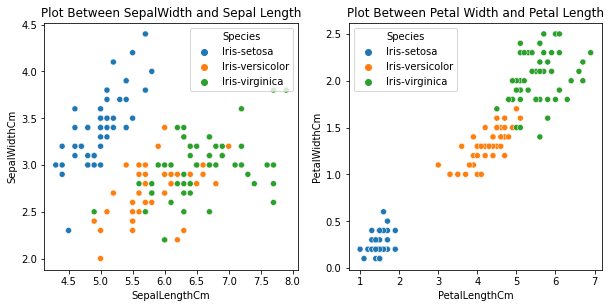

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
ax1=sns.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm',hue='Species')
ax1.set_title('Plot Between SepalWidth and Sepal Length')
plt.subplot(2,2,2)
ax2=sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Species')
ax2.set_title('Plot Between Petal Width and Petal Length')

# Preprocessing on data ,using Label Encoder on species feature

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
enc_sp=le.fit_transform(data['Species'])
data['Encoded_Species']=enc_sp
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [14]:
cluster=KMeans(3)

In [35]:
x=data.iloc[:,1:]
x=x.drop('Species',axis=1)

In [36]:
cluster.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
label=cluster.predict(x)
data['Label']=label

In [39]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_Species,Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,1


Text(0.5, 1.0, 'Plot Between Petal Width and Petal Length')

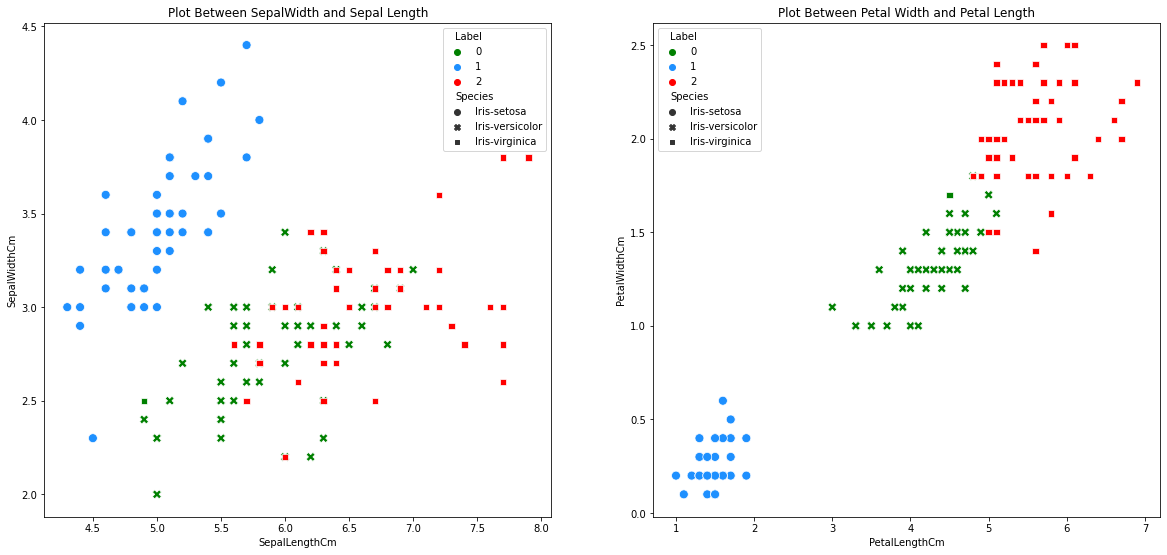

In [41]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
ax1=sns.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm',hue='Label',style='Species',palette=['green','dodgerblue','red'],s=80)
ax1.set_title('Plot Between SepalWidth and Sepal Length')
plt.subplot(2,2,2)
ax2=sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Label',style='Species',palette=['green','dodgerblue','red'],s=80)
ax2.set_title('Plot Between Petal Width and Petal Length')